In [1]:
import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [45]:
data = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(data)

In [47]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [48]:
df.dtypes[df.dtypes == 'object']

customerID          object
gender              object
Partner             object
Dependents          object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
TotalCharges        object
Churn               object
dtype: object

## 3.2: Data Preparation

In [49]:
def cleanup_data(df):
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    for c in list(df.dtypes[df.dtypes == 'object'].index):
        df[c] = df[c].str.lower().replace(' ', '_')

In [50]:
cleanup_data(df)

In [51]:
def summary(df, max_unique=10):
    """
    Print all unique categorical values 
    For quantifier values just print the first value
    """
    for d in list(df.dtypes.index):
        if df[d].nunique() < max_unique:
            print(d, df[d].unique())
        else:
            print(d, df[d][0], sep=" ---XXX--- ")
summary(df)

customerid ---XXX--- 7590-vhveg
gender ['female' 'male']
seniorcitizen [0 1]
partner ['yes' 'no']
dependents ['no' 'yes']
tenure ---XXX--- 1
phoneservice ['no' 'yes']
multiplelines ['no phone service' 'no' 'yes']
internetservice ['dsl' 'fiber optic' 'no']
onlinesecurity ['no' 'yes' 'no internet service']
onlinebackup ['yes' 'no' 'no internet service']
deviceprotection ['no' 'yes' 'no internet service']
techsupport ['no' 'yes' 'no internet service']
streamingtv ['no' 'yes' 'no internet service']
streamingmovies ['no' 'yes' 'no internet service']
contract ['month-to-month' 'one year' 'two year']
paperlessbilling ['yes' 'no']
paymentmethod ['electronic check' 'mailed check' 'bank transfer (automatic)'
 'credit card (automatic)']
monthlycharges ---XXX--- 29.85
totalcharges ---XXX--- 29.85
churn ['no' 'yes']


In [52]:
df.dtypes # list out all the types

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [53]:
# value conversion
df.totalcharges = pd.to_numeric(df.totalcharges, errors="coerce").fillna(0)

In [54]:
# change of value
df.churn = (df.churn=="yes").astype('int')

## 3.3 Setting up the validation Framework

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
train_test_split?

In [57]:
df_full_train, df_test = train_test_split(df, test_size=.2,random_state=1)

In [58]:
df_full_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
1814,5442-pptjy,male,0,yes,yes,12,yes,no,no,no internet service,...,no internet service,no internet service,no internet service,no internet service,two year,no,mailed check,19.70,258.35,0
5946,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one year,no,credit card (automatic),73.90,3160.55,1
3881,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two year,no,bank transfer (automatic),65.15,4681.75,0
2389,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one year,no,electronic check,85.45,6300.85,0
3676,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one year,no,electronic check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,0781-lkxbr,male,1,no,no,9,yes,yes,fiber optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic check,100.50,918.60,1
5192,3507-gasnp,male,0,no,yes,60,yes,no,no,no internet service,...,no internet service,no internet service,no internet service,no internet service,two year,no,mailed check,19.95,1189.90,0
3980,8868-wozgu,male,0,no,no,28,yes,yes,fiber optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic check,105.70,2979.50,1
235,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed check,54.40,114.10,1


In [59]:
df_train, df_val = train_test_split(df_full_train, test_size=.25, random_state=1)

In [60]:
len(df_full_train), len(df_train), len(df_val), len(df_test)

(5634, 4225, 1409, 1409)

In [61]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [62]:
del df_train["churn"]
del df_val["churn"]
del df_test["churn"]

# EDA - Exploratory Data Analysis

In [63]:
df_full_train = df_full_train.reset_index(drop=True)

In [65]:
df_full_train.churn.value_counts()

0    4113
1    1521
Name: churn, dtype: int64

In [66]:
df_full_train.churn.value_counts(normalize=True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

In [67]:
global_churn_rate = df_full_train.churn.mean()

In [68]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [134]:
numerical = {"tenure", "monthlycharges", "totalcharges"}
categorical = {*set(df_full_train.dtypes[df_full_train.dtypes == "object"].index) - numerical, "seniorcitizen" } - {"customerid"}
categorical

{'contract',
 'dependents',
 'deviceprotection',
 'gender',
 'internetservice',
 'multiplelines',
 'onlinebackup',
 'onlinesecurity',
 'paperlessbilling',
 'partner',
 'paymentmethod',
 'phoneservice',
 'seniorcitizen',
 'streamingmovies',
 'streamingtv',
 'techsupport'}

In [125]:
for c in categorical:
    u = df_full_train[c].unique()
    print(c, u, sep="\t", end="\n")

customerid	['5442-pptjy' '6261-rcvns' '2176-osjuv' ... '8868-wozgu' '1251-krreg'
 '5840-nvdcg']
seniorcitizen	[0 1]
phoneservice	['yes' 'no']
streamingmovies	['no internet service' 'yes' 'no']
onlinebackup	['no internet service' 'yes' 'no']
streamingtv	['no internet service' 'no' 'yes']
internetservice	['no' 'dsl' 'fiber optic']
contract	['two year' 'one year' 'month-to-month']
paperlessbilling	['no' 'yes']
partner	['yes' 'no']
deviceprotection	['no internet service' 'yes' 'no']
onlinesecurity	['no internet service' 'yes' 'no']
techsupport	['no internet service' 'yes' 'no']
multiplelines	['no' 'yes' 'no phone service']
dependents	['yes' 'no']
paymentmethod	['mailed check' 'credit card (automatic)' 'bank transfer (automatic)'
 'electronic check']
gender	['male' 'female']


# 3.5 Feature Importance: Churn rate and Risk ratio

**Churn rate**

In [126]:
df_full_train[df_full_train.gender=="female"].churn.mean()

0.27682403433476394

In [127]:
df_full_train[df_full_train.gender=="male"].churn.mean()

0.2632135306553911

In [128]:
churn_partner = df_full_train[df_full_train.partner=='yes'].churn.mean()

In [129]:
churn_no_partner = df_full_train[df_full_train.partner=='no'].churn.mean()

In [130]:
global_churn_rate - churn_partner

0.06493474245795922

In [131]:
risk_ratio_no_partner = churn_no_partner/global_churn_rate
risk_ratio_no_partner # risk ratio is 22% higher

1.2216593879412643

In [132]:
risk_ratio_partner = churn_partner/global_churn_rate
risk_ratio_partner # risk ratio is 25% less

0.7594724924338315

In [135]:
from IPython.display import display
for c in categorical:
    # group by feature to find important features
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    display(df_group)
    print()

,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no internet service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no internet service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no internet service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one year,0.120573,1186,-0.149395,0.446621
two year,0.028274,1344,-0.241694,0.104730


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no internet service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no internet service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no internet service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no phone service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651


,mean,count,diff,risk
paymentmethod,,,,
bank transfer (automatic),0.168171,1219,-0.101797,0.622928
credit card (automatic),0.164339,1217,-0.105630,0.608733
electronic check,0.455890,1893,0.185922,1.688682
mailed check,0.193870,1305,-0.076098,0.718121


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


# 3.6 Feature importance: Mutual information

_[Look up Bayesian Statistics for this](https://www.youtube.com/watch?v=U9h1xkNELvY)_

In [136]:
from sklearn.metrics import mutual_info_score

In [137]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.09832038740415643

In [138]:
mutual_info_score(df_full_train.churn, df_full_train.gender)

0.00011748462111393909

In [139]:
mutual_info_score(df_full_train.churn, df_full_train.paymentmethod)

0.04321002753158276

In [143]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)
mutual_scores = df_full_train[list(categorical)].apply(mutual_info_churn_score).sort_values(ascending=False)

In [144]:
mutual_scores.head()

contract           0.098320
onlinesecurity     0.063085
techsupport        0.061032
internetservice    0.055868
onlinebackup       0.046923
dtype: float64

# 3.7 Feature Importance: Corelation aka Pearson's relation

In [147]:
df_full_train[list(numerical)].corrwith(df_full_train.churn)

monthlycharges    0.196805
tenure           -0.351885
totalcharges     -0.196353
dtype: float64

In [148]:
df_full_train.monthlycharges.max()

118.65

In [152]:
df_full_train[df_full_train.monthlycharges < 20].churn.mean()

0.08829568788501027

In [156]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges < 75)].churn.mean()

0.22598001537279017

In [158]:
df_full_train[df_full_train.monthlycharges > 75].churn.mean()

0.3531761885737115

# 3.8 One-Hot Encoding

In [160]:
from sklearn.feature_extraction import DictVectorizer

In [166]:
df_train[['gender', 'contract']].iloc[:10]

,gender,contract
3897,female,two year
1980,male,month-to-month
6302,female,month-to-month
727,female,month-to-month
5104,female,two year
5387,male,month-to-month
459,male,month-to-month
5023,female,month-to-month
6778,female,two year
1176,female,month-to-month


In [164]:
df_train[['gender', 'contract']].iloc[:10].to_dict()

{'gender': {3897: 'female',
  1980: 'male',
  6302: 'female',
  727: 'female',
  5104: 'female',
  5387: 'male',
  459: 'male',
  5023: 'female',
  6778: 'female',
  1176: 'female'},
 'contract': {3897: 'two year',
  1980: 'month-to-month',
  6302: 'month-to-month',
  727: 'month-to-month',
  5104: 'two year',
  5387: 'month-to-month',
  459: 'month-to-month',
  5023: 'month-to-month',
  6778: 'two year',
  1176: 'month-to-month'}}

In [179]:
df_full_train.gender.head()

0      male
1    female
2      male
3      male
4      male
Name: gender, dtype: object

In [174]:
dicts = df_train[['gender', 'contract']].iloc[:100].to_dict(orient='records')

In [175]:
dv = DictVectorizer(sparse=False)
dv.fit(dicts)

DictVectorizer(sparse=False)

In [176]:
dv.transform(dicts)

array([[0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0.

In [178]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one year',
       'contract=two year', 'gender=female', 'gender=male'], dtype=object)

_Look up Sparse Matrix_

---

In [181]:
train_dicts = df_train[list(categorical)+list(numerical)].to_dict(orient='records')

In [191]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dicts)

DictVectorizer(sparse=False)

In [186]:
from IPython.display import display
display(list(dv.transform(train_dicts[:5])))

[array([0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 1.15500e+02, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 7.20000e+01, 8.42515e+03]),
 array([1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 9.52500e+01, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.

In [187]:
X_train = dv.fit_transform(train_dicts)

In [189]:
val_dicts = df_val[list(categorical)+list(numerical)].to_dict(orient='records')
X_val = dv.transform(val_dicts)

---

**Revision Start**

---

First thing to do is to split the data. We can easily do so with `scikit-learn` as shown below

In [210]:
# Split the data
from sklearn.model_selection import train_test_split
XX_train_full, XX_test = train_test_split(df, test_size=0.2, random_state=1)
XX_train, XX_val = train_test_split(XX_train_full, test_size=0.25, random_state=1)

In [215]:
XX_train = XX_train.reset_index(drop=True)

Second thing, but optional, is to analyze the table

In [216]:
# analyze the table 
XX_train[:3].T

,0,1,2
customerid,8015-ihcgw,1960-uycnn,9250-wypll
gender,female,male,female
seniorcitizen,0,0,0
partner,yes,no,no
dependents,yes,no,no
tenure,72,10,5
phoneservice,yes,yes,yes
multiplelines,yes,yes,yes
internetservice,fiber optic,fiber optic,fiber optic
onlinesecurity,yes,no,no


In [266]:
# Features that we care about
features = list(set(XX_train.columns) - {"customerid","churn"})

The idea is to find which feature is having a strong co-relation with our target variable (`churn` in our case).  
There are two types of features that can be encountered. "categorical" and "numerical"

A naive approach is to take the mean of each category's target value and see how well they are distributed among that same category. Like below

| gender(categorical value) | video_game(target) |
|--------|------------|
| male | 1 |
| female | 1 |
| male | 0 |
| male | 1 |
| female | 1 |
| female | 0 |

global target value is (1+1+0+1+0+1)/6 = .66    
male feature = (1+0+1)/3 = 0.66  
female feature = (1+1+0)/3 = 0.66  

But the above approach makes it hard to determine which feature is playing significant role amongst other features. e.g.

|gender|age|life status|video_game|
|-|-|-|-|
|male|12|rich|1|
|female|19|rich|1|
|male|33|rich|1|
|male|13|poor|0|
|female|24|middle|0|

It is hard to tell which feature has more importance based on above approach. So, to overcome that "mutual information" is used. This tells how a feature is playing a role compared to other features in overall data[^1].  
This can simply be done with `scikit-learn`'s `mutual_info_score` [^2].

---

> **Note**: Research more later

[^1]: Has something to do with Bayesian statistics  
[^2]: Expand more on how to do this manually rather than just relying on `scikit-learn`

In [218]:
# For categorical, we can do so by using mutual information 
from sklearn.metrics import mutual_info_score
mutual_info_score?

In [219]:
XX_train.apply?

In [225]:
def mis(df, y):
    return mutual_info_score(df, y)

In [235]:
ms = XX_train[
    [
        'gender',
        'seniorcitizen',
        'partner',
        'dependents',
        'tenure',
        'phoneservice',
        'multiplelines',
        'internetservice',
        'onlinesecurity',
        'onlinebackup',
        'deviceprotection',
        'techsupport',
        'streamingtv',
        'streamingmovies',
        'contract',
        'paperlessbilling',
        'paymentmethod',
    ]
].apply(mis, args=[XX_train.churn]).sort_values(ascending=False)

In [239]:
# grab only 70% of the top table
ms[ms.values > ms.values.max() * .3]

contract            0.099016
tenure              0.087314
onlinesecurity      0.061654
techsupport         0.057836
internetservice     0.052373
onlinebackup        0.042997
deviceprotection    0.041384
paymentmethod       0.035928
streamingtv         0.030897
streamingmovies     0.030317
dtype: float64

Same can be done for numerical features with `corrwith`[^1] from pandas.

---
> **Note**: Research later

[^1]: Co-relation with numerical only or with categorical values too?

In [247]:
XX_train[['tenure', 'monthlycharges', 'totalcharges']].corrwith(XX_train.churn).sort_values(ascending=False)

monthlycharges    0.189665
totalcharges     -0.199645
tenure           -0.355962
dtype: float64

With all the information above, there is still one problem with categorical values. i.e. they cannot be easily quantified by computers. 
In order for computer to quantify them, they are flattened or in the industry speak, they are **"one-hot-encoded"**. So every category in a feature is represented as a new feature but with 0/1s in that particular row.
e.g.

Let's say we have

| gender(categorical value) | video_game(target) |
|--------|------------|
| male | 1 |
| female | 1 |
| male | 0 |
| male | 1 |
| female | 1 |
| female | 0 |

One hot encoding would be


| male | female | video_game(target) |
|-|-|-|
| 1 | 0 | 1 |
| 0 | 1 | 1 |
| 1 | 0 | 0 |
| 1 | 0 | 1 |
| 0 | 1 | 1 |
| 0 | 1 | 0 |

Instead of doing it manually like above, there is a simple way to do that in `scikit-learn` with `DictVector`.
Although, there is `OneHotEncoder` available that does the exact same thing - `DictVector` apparently is preferred

In [267]:
from sklearn.feature_extraction import DictVectorizer
XX_train_dict = XX_train[features].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit_transform(XX_train_dict)

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        7.20000e+01, 8.42515e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+01, 1.02155e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        5.00000e+00, 4.13650e+02],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        2.00000e+00, 1.90050e+02],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        2.70000e+01, 7.61950e+02],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        9.00000e+00, 7.51650e+02]])

In [268]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one year',
       'contract=two year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no internet service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no phone service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no internet service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no internet service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank transfer (automatic)',
       'paymentmethod=credit card (automatic)',
       'paymentmethod=electronic check', 'paymentmethod=mailed check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no internet service',

---

# 3.9: Logistic Regression

In [271]:
def sigmoid(z):
    return 1 / (1+ np.exp(-z))

In [272]:
z = np.linspace(-10,10,51)

In [280]:
def linear_regression(X):
    score = w0
    
    for i in len(w):
        score += X[i] * w[i]
    result = sigmoid(score)
    return score

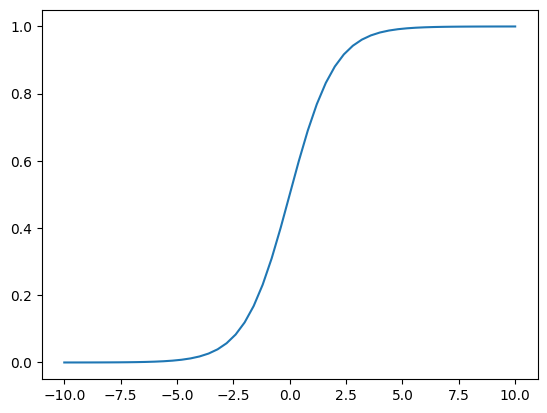

In [281]:
import matplotlib.pyplot as plt
plt.plot(z,sigmoid(z))

# 3.10: Training Logistic Regression with scikit-learn

In [282]:
from sklearn.linear_model import LogisticRegression

In [283]:
model = LogisticRegression()
model.fit(X_train, y_train)

/home/shriek/sandbox/learn/mlbookcamp/2022/mlzoomcamp_2022/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [306]:
model.coef_[0].round(3), len(model.coef_[0]), len(X_train[0])

(array([ 0.471, -0.175, -0.404, -0.028, -0.079,  0.063, -0.089, -0.082,
        -0.035, -0.073, -0.334,  0.316, -0.089,  0.004, -0.259,  0.14 ,
         0.011,  0.063, -0.089, -0.082,  0.266, -0.089, -0.285, -0.233,
         0.125, -0.165,  0.057, -0.087, -0.032,  0.073, -0.061,  0.14 ,
        -0.248,  0.215, -0.12 , -0.089,  0.101, -0.07 , -0.089,  0.052,
         0.214, -0.089, -0.233, -0.071,  0.   ]),
 45,
 45)

In [309]:
y_pred = model.predict_proba(X_val)[:, 1]

In [310]:
churn_decision = y_pred >= 0.5

In [325]:
pd.options.display.max_rows = None
df_val[churn_decision].customerid

2504    8433-wxgna
4597    3440-jpscl
2343    2637-fkfsy
5591    7228-omtpn
4482    6711-fldfb
3610    2612-ranwt
2010    3074-gqwyx
2102    2911-wdxmv
3529    2880-fpnae
2038    9172-jitsm
428     4360-pnrqb
6179    6328-zpbgn
3413    5294-dmsfh
1583    2720-fvbqp
484     5949-xikae
5653    7638-qvmvy
4775    5480-tbgph
2004    8565-clbzw
6133    9638-jiqya
326     5701-yvsvf
3775    1866-rzzqs
3305    5144-tvglp
5019    3320-veoyc
5711    1891-uawwu
6831    9451-lpgoo
3524    4706-axvkm
3829    8374-xgejj
5810    9102-iayht
3340    6015-vvhhe
284     9512-uibfx
1001    1989-prjhp
5760    4583-parnh
1669    5405-zmyxq
1910    6637-kyrcv
5       9305-cdskc
6001    4367-nhwmm
4494    0225-zorzp
3034    7120-rfmvs
2727    3387-vatus
4997    4816-jbhov
4981    8008-hawed
3154    0581-bxbub
5956    3640-phqxk
6862    1273-mteti
6195    8111-rkspx
4826    3389-ygyai
5125    2982-vpsgi
6453    8634-mphtr
1739    9804-icwbg
755     6683-vlctz
801     1450-galxr
5967    5167-gbfre
4869    1384

In [327]:
error = (churn_decision == y_val).mean()
error

0.8026969481902059

# 3.11: Model Interpretation

In [332]:
sorted(list(zip(dv.get_feature_names_out(), model.coef_[0].round(3))))

[('contract=month-to-month', 0.471),
 ('contract=one year', -0.175),
 ('contract=two year', -0.404),
 ('dependents=no', -0.028),
 ('dependents=yes', -0.079),
 ('deviceprotection=no', 0.063),
 ('deviceprotection=no internet service', -0.089),
 ('deviceprotection=yes', -0.082),
 ('gender=female', -0.035),
 ('gender=male', -0.073),
 ('internetservice=dsl', -0.334),
 ('internetservice=fiber optic', 0.316),
 ('internetservice=no', -0.089),
 ('monthlycharges', 0.004),
 ('multiplelines=no', -0.259),
 ('multiplelines=no phone service', 0.14),
 ('multiplelines=yes', 0.011),
 ('onlinebackup=no', 0.063),
 ('onlinebackup=no internet service', -0.089),
 ('onlinebackup=yes', -0.082),
 ('onlinesecurity=no', 0.266),
 ('onlinesecurity=no internet service', -0.089),
 ('onlinesecurity=yes', -0.285),
 ('paperlessbilling=no', -0.233),
 ('paperlessbilling=yes', 0.125),
 ('partner=no', -0.165),
 ('partner=yes', 0.057),
 ('paymentmethod=bank transfer (automatic)', -0.087),
 ('paymentmethod=credit card (automa

In [333]:
# Training smaller features
small_feat = ['contract', 'tenure', 'monthlycharges']
df_train[small_feat]

,contract,tenure,monthlycharges
3897,two year,72,115.50
1980,month-to-month,10,95.25
6302,month-to-month,5,75.55
727,month-to-month,5,80.85
5104,two year,18,20.10
5387,month-to-month,4,30.50
459,month-to-month,1,75.10
5023,month-to-month,1,70.30
6778,two year,72,19.75
1176,month-to-month,6,109.90


In [336]:
dv_small = DictVectorizer(sparse=False)
X_train_small = dv_small.fit_transform(df_train[small_feat].to_dict(orient='records'))

In [339]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [343]:
w0, w = model_small.intercept_[0], model_small.coef_[0]
print(w0,w)

-2.4767756597575263 [ 0.97004491 -0.02513651 -0.94872202  0.02748236 -0.03618424]


In [348]:
X_val_small = dv_small.fit_transform(df_val[small_feat].to_dict(orient='records'))
# y_pred_10 = w0 + 
y_pred_10 = w0 + w.dot(X_val_small[10])

In [350]:
sigmoid(y_pred_10)

0.04099431621211895